In [1]:
import pandas as pd
import numpy as np

In [2]:
ataques = pd.read_csv('ataques_modificados.csv')
ataques

,ID persona,Edad,Genero,Antecedentes familiares,Nivel de estres,Sintomas,Severidad,Impacto en la vida,Apoyo social,Panic Disorder Diagnosis
0,1,38,Hombre,No,Moderado,Dificultad para respirar,Bajo,Bajo,Alto,0
1,2,51,Hombre,No,Alto,Ataques de panico,Bajo,Bajo,Alto,0
2,3,32,Mujer,Si,Alto,Ataques de panico,Bajo,Alto,Moderado,0
3,4,64,Mujer,No,Moderado,Dolor de pecho,Moderado,Moderado,Alto,0
4,5,31,Hombre,Si,Moderado,Ataques de panico,Bajo,Moderado,Bajo,0
...,...,...,...,...,...,...,...,...,...,...
119995,19996,31,Mujer,Si,Alto,Dolor de pecho,Moderado,Moderado,Moderado,0
119996,19997,27,Hombre,No,Alto,Ataques de panico,Bajo,Moderado,Alto,0
119997,19998,21,Mujer,No,Bajo,Mareos,Moderado,Alto,Moderado,0
119998,19999,28,Hombre,No,Moderado,Mareos,Bajo,Alto,Moderado,0


In [3]:
ataques[ataques['Panic Disorder Diagnosis'] == 1]

,ID persona,Edad,Genero,Antecedentes familiares,Nivel de estres,Sintomas,Severidad,Impacto en la vida,Apoyo social,Panic Disorder Diagnosis
47,48,59,Hombre,No,Alto,Dificultad para respirar,Moderado,Alto,Bajo,1
107,108,41,Hombre,No,Moderado,Ataques de panico,Moderado,Alto,Moderado,1
109,110,31,Mujer,Si,Alto,Mareos,Moderado,Alto,Bajo,1
110,111,19,Hombre,No,Moderado,Ataques de panico,Alto,Alto,Bajo,1
117,118,65,Mujer,No,Alto,Mareos,Bajo,Alto,Alto,1
...,...,...,...,...,...,...,...,...,...,...
119885,19886,27,Hombre,Si,Bajo,Ataques de panico,Alto,Bajo,Bajo,1
119943,19944,40,Mujer,No,Alto,Ataques de panico,Moderado,Alto,Bajo,1
119983,19984,65,Hombre,No,Alto,Dificultad para respirar,Moderado,Alto,Alto,1
119986,19987,19,Hombre,Si,Alto,Dolor de pecho,Alto,Alto,Moderado,1


In [15]:
def asignar_nivel(ataques):
    antecedentes = ataques["Antecedentes familiares"]
    estres = ataques['Nivel de estres']
    sintomas = ataques['Sintomas']
    severidad = ataques['Severidad']
    impacto = ataques['Impacto en la vida']
    apoyo = ataques['Apoyo social']
    diagnostico = ataques['Panic Disorder Diagnosis']

    # Asigna el nivel de ataques basado en las condiciones dadas
    if diagnostico == 1:
            return 4
    elif diagnostico == 0:
        if sintomas in ['Ataques de panico']:
            return 4
        elif sintomas in ['Dificultad para respirar'] and antecedentes == 'Si':
            return 3
        elif sintomas in ['Dificultad para respirar'] and apoyo == 'Bajo':
            return 3
        elif sintomas in ['Dificultad para respirar'] and antecedentes == 'No':
            return 2
        elif sintomas in ['Dificultad para respirar'] and apoyo in ['Moderado', 'Alto']:
            return 2
        elif sintomas in ['Dolor en el pecho'] and impacto == 'Alto':
            return 3
        elif sintomas in ['Dolor en el pecho'] and impacto in ['Moderado', 'Bajo']:
            return 2
        elif sintomas in ['Miedo a perder el control'] and apoyo == 'Bajo':
            return 3
        elif sintomas in ['Miedo a perder el control'] and apoyo in ['Moderado', 'Alto']:
            return 2
        elif sintomas in ['Mareos'] and antecedentes == 'Si':
            return 2
        else:
            return 1
    else:
        return None  # Si no cumple ninguna de las condiciones, puede devolver un valor predeterminado o None
    

ataques['Nivel de ansiedad'] = ataques.apply(asignar_nivel, axis=1)

In [16]:
ataques

,ID persona,Edad,Genero,Antecedentes familiares,Nivel de estres,Sintomas,Severidad,Impacto en la vida,Apoyo social,Panic Disorder Diagnosis,Nivel de ansiedad
0,1,38,Hombre,No,Moderado,Dificultad para respirar,Bajo,Bajo,Alto,0,2
1,2,51,Hombre,No,Alto,Ataques de panico,Bajo,Bajo,Alto,0,4
2,3,32,Mujer,Si,Alto,Ataques de panico,Bajo,Alto,Moderado,0,4
3,4,64,Mujer,No,Moderado,Dolor de pecho,Moderado,Moderado,Alto,0,1
4,5,31,Hombre,Si,Moderado,Ataques de panico,Bajo,Moderado,Bajo,0,4
...,...,...,...,...,...,...,...,...,...,...,...
119995,19996,31,Mujer,Si,Alto,Dolor de pecho,Moderado,Moderado,Moderado,0,1
119996,19997,27,Hombre,No,Alto,Ataques de panico,Bajo,Moderado,Alto,0,4
119997,19998,21,Mujer,No,Bajo,Mareos,Moderado,Alto,Moderado,0,1
119998,19999,28,Hombre,No,Moderado,Mareos,Bajo,Alto,Moderado,0,1


In [8]:
ataques['Sintomas'].value_counts()

Sintomas
Mareos                       24173
Miedo a perder el control    24164
Dolor de pecho               23980
Dificultad para respirar     23919
Ataques de panico            23764
Name: count, dtype: int64

In [17]:
ataques['Nivel de ansiedad'].value_counts()

Nivel de ansiedad
1    35074
2    35061
4    26733
3    23132
Name: count, dtype: int64

In [19]:
ataques = ataques.drop(['ID persona', 'Panic Disorder Diagnosis'], axis= 1)

In [20]:
ataques

,Edad,Genero,Antecedentes familiares,Nivel de estres,Sintomas,Severidad,Impacto en la vida,Apoyo social,Nivel de ansiedad
0,38,Hombre,No,Moderado,Dificultad para respirar,Bajo,Bajo,Alto,2
1,51,Hombre,No,Alto,Ataques de panico,Bajo,Bajo,Alto,4
2,32,Mujer,Si,Alto,Ataques de panico,Bajo,Alto,Moderado,4
3,64,Mujer,No,Moderado,Dolor de pecho,Moderado,Moderado,Alto,1
4,31,Hombre,Si,Moderado,Ataques de panico,Bajo,Moderado,Bajo,4
...,...,...,...,...,...,...,...,...,...
119995,31,Mujer,Si,Alto,Dolor de pecho,Moderado,Moderado,Moderado,1
119996,27,Hombre,No,Alto,Ataques de panico,Bajo,Moderado,Alto,4
119997,21,Mujer,No,Bajo,Mareos,Moderado,Alto,Moderado,1
119998,28,Hombre,No,Moderado,Mareos,Bajo,Alto,Moderado,1


In [21]:
genero_num = {'Hombre' : 0 , 'Mujer' : 1}
antecedentes_num = {'No' : 0, 'Si' : 1}
estres_num = {'Bajo' : 0 , 'Moderado' : 1 , 'Alto' : 2}
sintomas_num = {'Mareos' : 0, 'Miedo a perder el control' : 1, 'Dolor de pecho' : 2, 'Dificultad para respirar':3,'Ataques de panico' : 4}
severidad_num = {'Bajo' : 0 , 'Moderado' : 1 , 'Alto' : 2}
impacto_num = {'Bajo' : 0 , 'Moderado' : 1 , 'Alto' : 2}
apoyo_num = {'Bajo' : 0 , 'Moderado' : 1 , 'Alto' : 2}

ataques["Genero"] = ataques["Genero"].replace(genero_num)
ataques["Antecedentes familiares"] = ataques["Antecedentes familiares"].replace(antecedentes_num)
ataques["Nivel de estres"] = ataques["Nivel de estres"].replace(estres_num)
ataques["Sintomas"] = ataques["Sintomas"].replace(sintomas_num)
ataques["Impacto en la vida"] = ataques["Impacto en la vida"].replace(impacto_num)
ataques["Severidad"] = ataques["Severidad"].replace(severidad_num)
ataques["Apoyo social"] = ataques["Apoyo social"].replace(apoyo_num)

In [22]:
ataques

,Edad,Genero,Antecedentes familiares,Nivel de estres,Sintomas,Severidad,Impacto en la vida,Apoyo social,Nivel de ansiedad
0,38,0,0,1,3,0,0,2,2
1,51,0,0,2,4,0,0,2,4
2,32,1,1,2,4,0,2,1,4
3,64,1,0,1,2,1,1,2,1
4,31,0,1,1,4,0,1,0,4
...,...,...,...,...,...,...,...,...,...
119995,31,1,1,2,2,1,1,1,1
119996,27,0,0,2,4,0,1,2,4
119997,21,1,0,0,0,1,2,1,1
119998,28,0,0,1,0,0,2,1,1


In [23]:
X = ataques.drop('Nivel de ansiedad', axis=1)
y = ataques['Nivel de ansiedad']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
rnd_clf.fit(X_test, y_test)

RandomForestClassifier(random_state=42)

In [27]:
y_pred_RFC = rnd_clf.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrixRFC = confusion_matrix(y_test, y_pred_RFC)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrixRFC)

Matriz de Confusión:
[[6985    0    0   10]
 [   0 6950    0    5]
 [   0    0 4703    6]
 [  35   37   26 5243]]


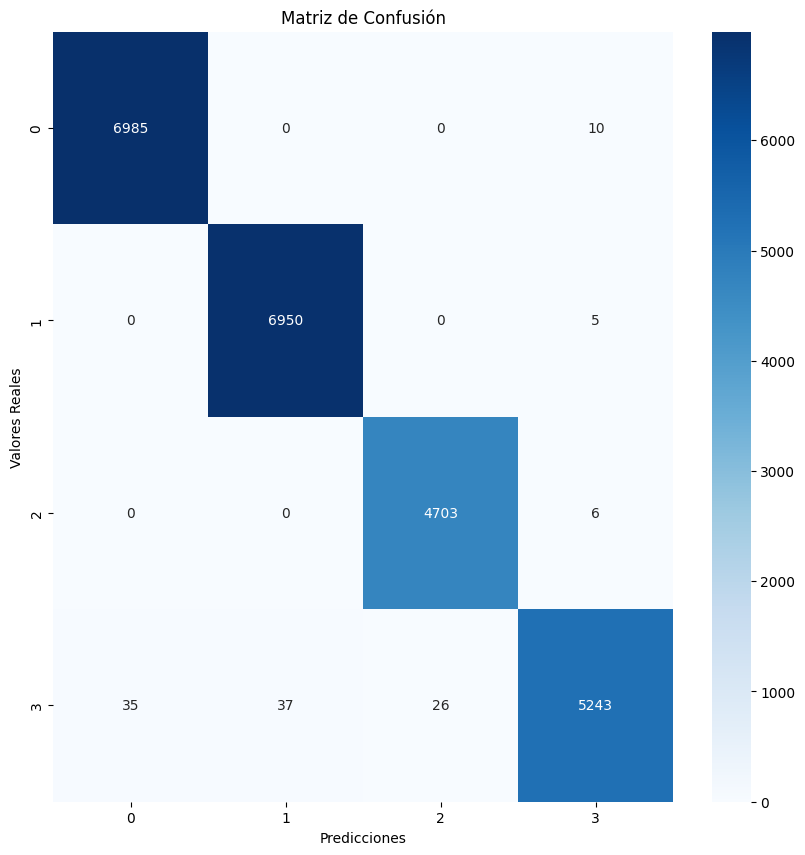

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrixRFC, annot=True, fmt='d', cmap='Blues')

plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [30]:
accuracyConf = accuracy_score(y_test, y_pred_RFC)
print("Precisión (Accuracy): {:.2f}%".format(accuracyConf*100))

Precisión (Accuracy): 99.50%


In [ ]:
import joblib

In [ ]:
joblib.dump(rnd_clf, 'Random_Forest_Classifier_model.pkl')